# Data Challenge - Regression

# Determing Rings From Abalone Data

In [2]:
library(dplyr)
library(ggplot2)
library(readr)
library(boot)
library(broom)
library(ISLR)
library(MASS)
library(class)
library(tree)
library(randomForest)
library(leaps)
library(glmnet)
#Include additional R packages as required

### Load data

In [3]:
abalone = read.csv("abalone.csv")

## Introduction

## Abalone

Abalone are marine snails which are widely consumed as food. The age of abalone may be
determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. This is a time-consuming task. It would be advantageous if other
measurements, which are easier to obtain, could be used to predict the number of rings, and
therefore the age. The abalone dataset contains information for 4177 abalone. For each
observation nine variables are recorded. The objective is to use the available explanatory
variables to predict the number of rings.

The `Abalone` dataset contains 9 Variables for 4177 abalone:
* `Sex` : M = Male, F = Female, I = Infant
* `Length` : Longest shell measurement (mm)
* `Diameter` : Measurement of shell perpendicular to length (mm)
* `Height` : Height of shell, with meat in shell (mm)
* `Whole weight` : Weight of whole abalone (grams)
* `Shucked weight` : Weight of meat (grams)
* `Viscera weight` : Gut weight (after bleeding) (grams)
* `Shell weight` : Shell weight after being dried (grams)
* `Rings` : Number of rings in shell (# rings +1.5 gives the age in years)

## Exploratory Analysis

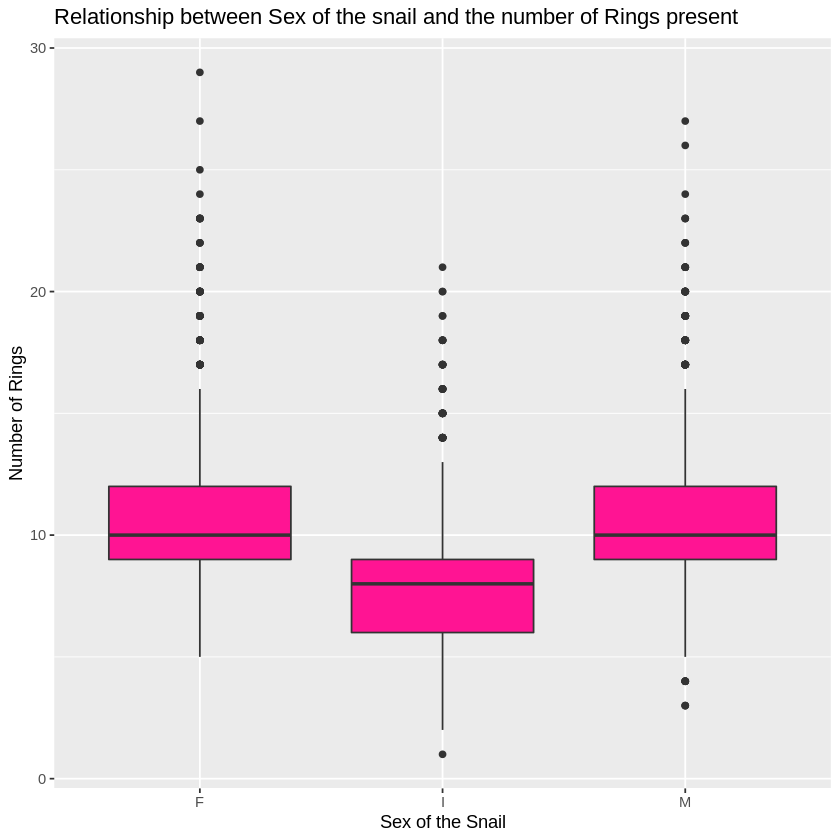

In [6]:
ggplot(data = abalone, aes(x = Sex, y = Rings)) + 
  geom_boxplot(fill = "deeppink") + 
  labs(x = "Sex of the Snail", y = "Number of Rings", 
       title = "Relationship between Sex of the snail and the number of Rings present")

This boxplot shows the relationship found between the number of rings found on a snail and the sex of the snail. This plot shows that the rings present on an infant snail is the lowest. Both male and female snails have very simillar number of rings present. This plot does show that males usally have more rings than the female snails.

`geom_smooth()` using formula 'y ~ x'



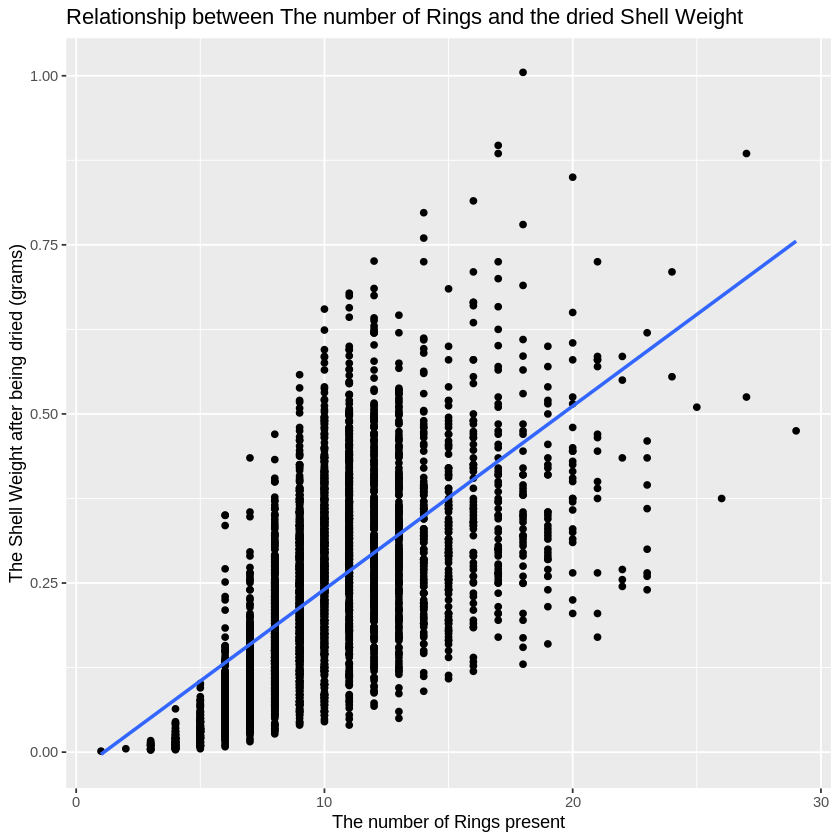

In [7]:
ggplot(data = abalone, aes(x = Rings, y = Shell_weight)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)+
  labs(x = "The number of Rings present", y = "The Shell Weight after being dried (grams)", 
       title = "Relationship between The number of Rings and the dried Shell Weight")

This plot shows the Relationship between The number of Rings and the dried Shell Weight for a snail. This plot shows that the higher the sheel weight, after being dried in grams is, the more rings the snail will have. This graph shows that as the shell weight increases so does the number of rings found.

`geom_smooth()` using formula 'y ~ x'



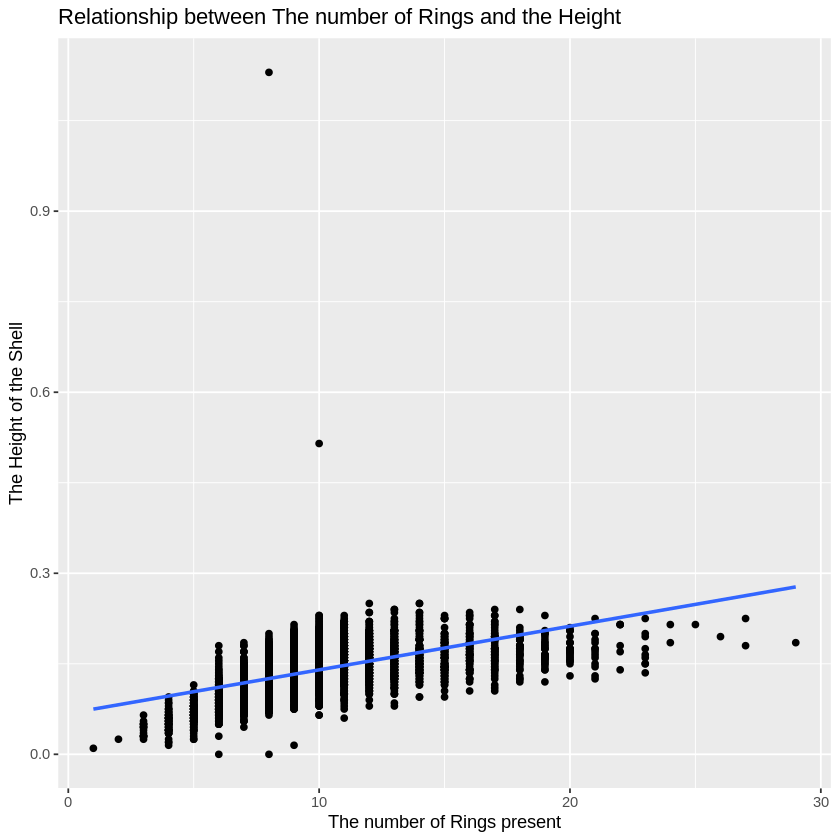

In [8]:
ggplot(data = abalone, aes(x = Rings, y = Height)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)+
  labs(x = "The number of Rings present", y = "The Height of the Shell", 
       title = "Relationship between The number of Rings and the Height")

This graph is able to show the relationship between the number of Rings and the Height. The relationship found is that height is able to have a small impact on the number of rings. The number of rings increase as height increases, however this graph has a flat slope, meaning that a large change in height wont provide a large change in the number of rings present. 

`geom_smooth()` using formula 'y ~ x'



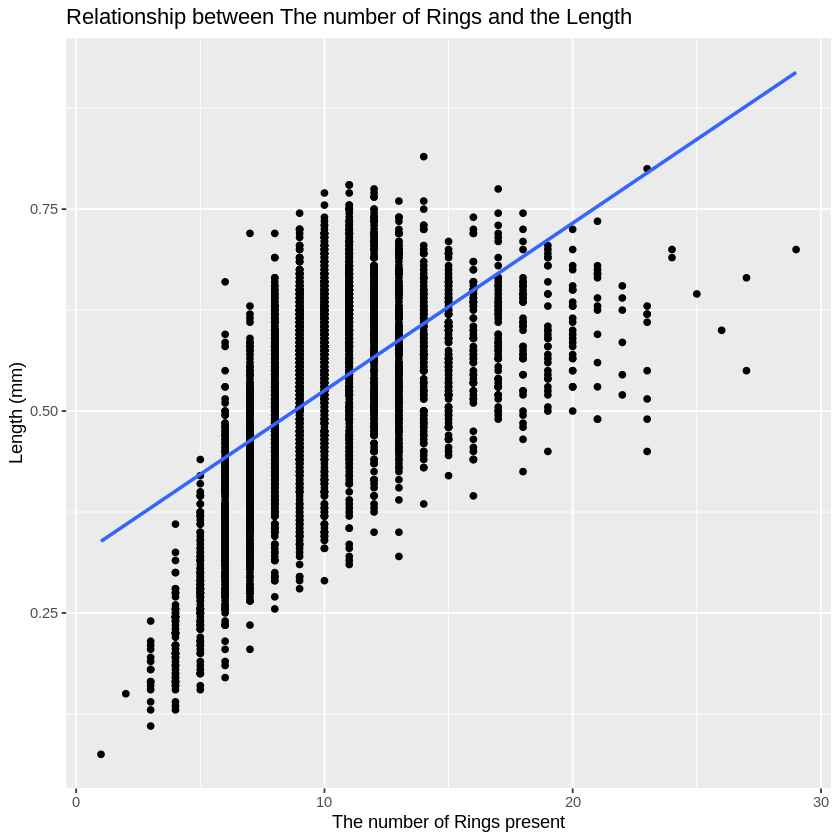

In [9]:
ggplot(data = abalone, aes(x = Rings, y = Length )) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE)+
  labs(x = "The number of Rings present", y = "Length (mm)", 
       title = "Relationship between The number of Rings and the Length")

This plot shows the Relationship between The number of Rings and the length of the longest shell measurment in mm. This plot shows that the higher the length the more rings the snail will have. This graph shows that as the length increases so does the number of rings found. This graph is found to have a steep slope, meaning that a small increase in length will result in an increase the number of rings seen. 

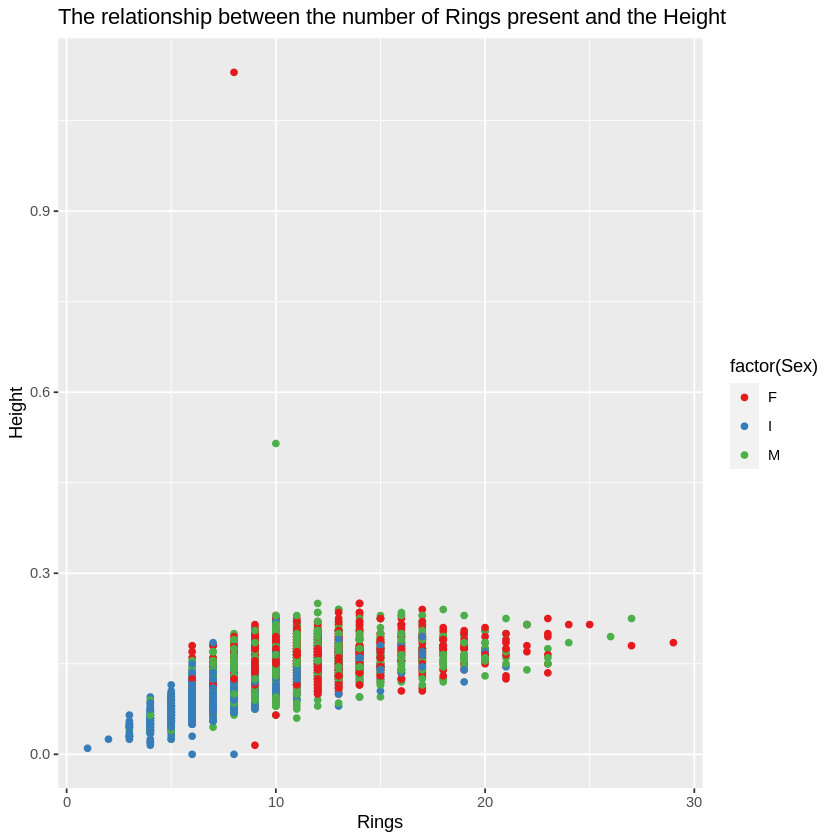

In [10]:
ggplot(abalone, aes(x = Rings, y = Height, colour = factor(Sex)))+
    geom_point() + ggtitle("The relationship between the number of Rings present and the Height") + scale_colour_brewer(type = "seq", palette = "Set1")

This plot shows the Relationship between The number of Rings and the height of the snail. This plot also showsa how the sex of the snail affects the Number of rings and the weight of the snail. From the plot, it can be seen that infants have less weight then adult snails and less rings. It can also be seen that the number of rings are simillar for both males and females. 

## Statistical Analysis

**Statistical analysis**:  
You should use three separate methods to model the response. For each method:
* identify the method being used
* if appropriate, briefly describe how the model was fit, including the choice of variables
* provide some indication of how well the model performed

### Decision Tree - Regression Tree

A regression tree fit with the entire data set is:


Regression tree:
tree(formula = Rings ~ ., data = abalone)
Variables actually used in tree construction:
[1] "Shell_weight"   "Sex"            "Shucked_weight"
Number of terminal nodes:  10 
Residual mean deviance:  5.443 = 22680 / 4167 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.8820 -1.5540 -0.5536  0.0000  0.9490 17.3000 

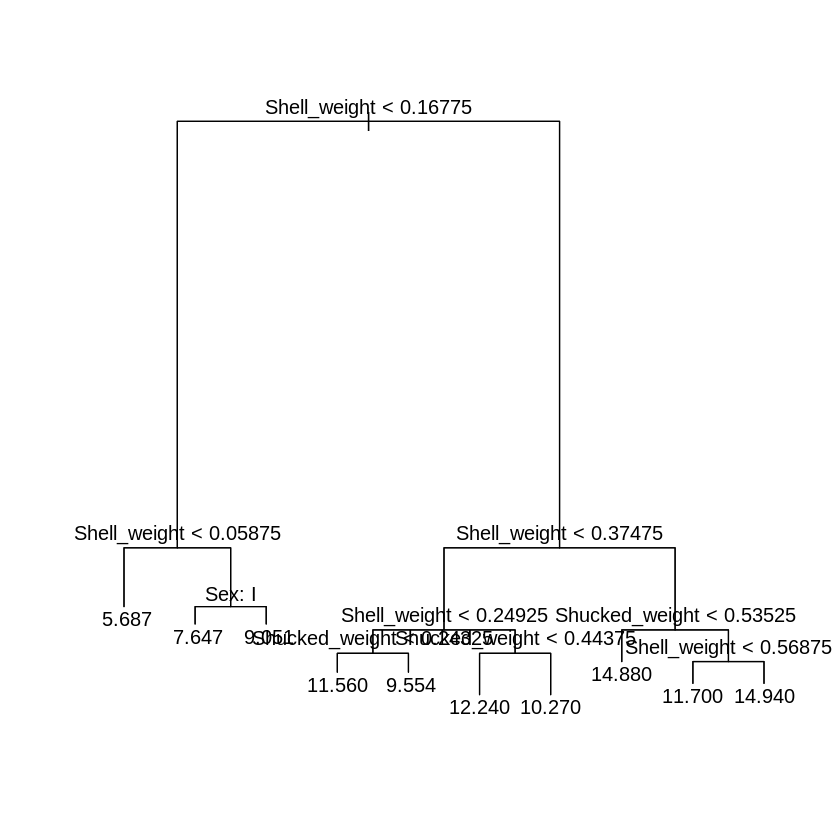

In [11]:
tree.Rings = tree(Rings ~. , data = abalone) 
summary(tree.Rings)
plot(tree.Rings)
text(tree.Rings, pretty = 0)

A Regresssion tree, or a decision tree is used to visualize the number of rings that will be present on a snail. The first split in the tree is shell weight. This suggests that the most important factor in determining the number of rings that willl be present is the shell weight of the snail after it has been dried, and this is also able to reduce the error rate of the model by the most significant amount, which is why it is the first split made. The other splits in the tree futher reduce the error rate for having an incorrect decision. This tree has 10 terminal nodes. These terminal nodes are the nodes that are the end of the decision tree, or the nodes that predict the outcome. This tree has a residual mean deviance of 5.443, meaning that this model fits the data well.

### Linear Discriminat Analysis

Fitting a Linear Discriminant Analysis Model with the `abalone` Data to predict `Rings` using the variables of `Sex`, `Height`, `Length`, `Diameter`, and `Shell_weight`.

In [12]:
lda.fit.1=lda(Rings ~ Sex + Height + Length + Diameter + Shell_weight, data=abalone)
lda.fit.1 

Call:
lda(Rings ~ Sex + Height + Length + Diameter + Shell_weight, 
    data = abalone)

Prior probabilities of groups:
           1            2            3            4            5            6 
0.0002394063 0.0002394063 0.0035910941 0.0136461575 0.0275317213 0.0620062246 
           7            8            9           10           11           12 
0.0936078525 0.1359827627 0.1649509217 0.1517835767 0.1165908547 0.0639214747 
          13           14           15           16           17           18 
0.0485994733 0.0301651903 0.0246588461 0.0160402203 0.0138855638 0.0100550634 
          19           20           21           22           23           24 
0.0076610007 0.0062245631 0.0033516878 0.0014364376 0.0021546565 0.0004788125 
          25           26           27           29 
0.0002394063 0.0002394063 0.0004788125 0.0002394063 

Group means:
         SexI       SexM     Height    Length  Diameter Shell_weight
1  1.00000000 0.00000000 0.01000000 0.0750000 0.0550000  0.

Linear Discriminant Analysis is used to test if a linear combination of features that characterizes or separates two or more classes of objects or events. For the abalone data, this means that this model is testing to see if any of the variables are correlated to one another. This model is able to tell us that LD1 is the best, as it is able to explain 75% of the varaince found in the data, compared to the nest closest LD model, which is, LD2 that only accounts for 23% of the variance in the data. 

### Bootstrap Aggregation

Bootstrap Aggregation, or the bagging produce, is used to analyze the training data.

In [13]:
set.seed (1)
train = sample(1: nrow(abalone), nrow(abalone)/2)

In [14]:
set.seed(1)
bag.train = randomForest(Rings ~., data=abalone, subset= train, importance =TRUE)
bag.train


Call:
 randomForest(formula = Rings ~ ., data = abalone, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 4.693572
                    % Var explained: 56.43

In [15]:
head(bag.train$predicted, 5)

1017      2177      1533      2347       270 
 9.591808 14.193864  5.552339 11.416847 10.501798

Bootstrap Aggregation is used to improve the accurancy, by reducing varaince and prevent overfitting. Using the bagigng method, 5 snails are selected and the number of reings present are displayed. This model does fit the data well, as this method is able to explain 56.43% of the varaince found in the data.

### Linear Regression Model

Fitting a Linear Regression Model with the `abalone` Data to predict `Rings` using the variables of `Sex`, `Height`, `Length`, `Diameter`, and `Shell_weight`.

In [16]:
model1=lm(Rings ~ Sex + Height + Length + Diameter + Shell_weight, data=abalone)
summary(model1)


Call:
lm(formula = Rings ~ Sex + Height + Length + Diameter + Shell_weight, 
    data = abalone)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5042  -1.5729  -0.4991   0.9341  15.3917 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.58232    0.29299  25.879  < 2e-16 ***
SexI          -0.92885    0.11394  -8.152 4.68e-16 ***
SexM          -0.14359    0.09313  -1.542    0.123    
Height        10.38858    1.71997   6.040 1.68e-09 ***
Length       -12.92243    1.96884  -6.563 5.90e-11 ***
Diameter      12.41805    2.49757   4.972 6.89e-07 ***
Shell_weight  12.38994    0.67194  18.439  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.463 on 4170 degrees of freedom
Multiple R-squared:  0.4173,	Adjusted R-squared:  0.4165 
F-statistic: 497.7 on 6 and 4170 DF,  p-value: < 2.2e-16


A Linear Regression Model is able to resprent how much each variable affects the number of rings present. This model includes Sex, Height, Length, Diameter and Shell_weight. This model is able to give us a regression equation that is equal to 
`Rings = 7.582 -0.9286I - 0.144M + 10.389Height - 12.922Length + 12.418Diameter + 12.390Shell_weight.` 
This represents that the number of rings that would be present on an infant snail would decrease by 0.929. Based on this model, the variable that has the most impact on the number of rings present in the Diameter. This can be seen because this variable has the largest slope coefficeint in the model. The data for this model for 41% of the variation found within the data, and this model was able to fit the data okay.

## Discussion

We can conclude that the number of rings present on abalone can be predicted using regression models, given the abalone data. These models were able to show what variables affected the number of rings present. The variable that is most important in determining the number of rings is shell_weight. This was true for all the models except the linear regression model, which had the variable of diameter affecting the number of rings the most, followed by shell weight. The best model that was computed was the Regression decision tree, which had a residual mean deviance of 5.443. The model that least fit the data was the linear regression model which was only able to account for 41.7% of the variation in the data. The number of rings present on marine snails can be predicted using the Shell_weight and diameter variables from the abolone data.